Subject: 2023F-T3 AML 3104 - Neural Networks and Deep Learning

Assignment#5

Submitted by: Olivia Deguit

Student ID: C0878491

Github Link: https://github.com/ovdlambton/NeuralNetwork/tree/main/Assignment_5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras as ks
import tensorflow as tf
import random as python_random
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense
import pickle

In [2]:
# Set fixed random seed for reproducibility
np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

In [3]:
# Load the California Housing dataset
housing = fetch_california_housing()

In [4]:
# Display the dataset's dictionary keys to understand the data structure
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
# Convert the independent variables (features) to a Pandas DataFrame for easier data manipulation and display the first 5 rows
X = pd.DataFrame(housing.data, columns=housing.feature_names)
X.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
# Assign the dependent variable (target, which is the house price) to 'y' the print the target values to see the house prices we're trying to predict
y = housing.target
print(y)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [7]:
# Generate descriptive statistics to understand the distribution of the feature data
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [8]:
# Check for missing values in the dataset. This will count the number of NaN values in each feature column
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [9]:
# Split dataset into train, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [10]:
# Scale the data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)
X_test_sc = scaler.transform(X_test)

In [11]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_sc, y_train)
y_pred_lr = lr_model.predict(X_test_sc)

In [12]:
# ANN Model
model_ann = Sequential([
    Dense(units=30, activation="relu", input_shape=X_train_sc.shape[1:]),
    Dense(units=10, activation="relu", name='HiddenLayer1'),
    Dense(units=5, activation="relu", name='HiddenLayer2'),
    Dense(units=1)
])
model_ann.compile(optimizer="sgd", loss="mse")
model_ann.fit(X_train_sc, y_train, epochs=40, validation_data=(X_val_sc, y_val))
y_pred_ann = model_ann.predict(X_test_sc).flatten()


Epoch 1/40

387/387 [==============================] - 1s 3ms/step - loss: 0.8039 - val_loss: 0.4853
Epoch 2/40
387/387 [==============================] - 1s 2ms/step - loss: 0.4777 - val_loss: 0.4273
Epoch 3/40
387/387 [==============================] - 1s 2ms/step - loss: 0.4379 - val_loss: 0.4114
Epoch 4/40
387/387 [==============================] - 1s 2ms/step - loss: 0.4187 - val_loss: 0.3896
Epoch 5/40
387/387 [==============================] - 1s 2ms/step - loss: 0.4077 - val_loss: 0.3786
Epoch 6/40
387/387 [==============================] - 1s 2ms/step - loss: 0.3967 - val_loss: 0.3653
Epoch 7/40
387/387 [==============================] - 1s 2ms/step - loss: 0.3894 - val_loss: 0.3601
Epoch 8/40
387/387 [==============================] - 1s 2ms/step - loss: 0.3845 - val_loss: 0.3612
Epoch 9/40
387/387 [==============================] - 1s 2ms/step - loss: 0.3780 - val_loss: 0.3580
Epoch 10/40
387/387 [==============================] - 1s 2ms/step - loss: 0.3751 - val_loss: 0.39

In [13]:
# Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} \n MAE: {mae} \n MSE: {mse} \n R2 Score: {r2}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_ann, "ANN")

Linear Regression 
 MAE: 0.5304369421957167 
 MSE: 0.5416495457975025 
 R2 Score: 0.5906573951895349
ANN 
 MAE: 0.3899561643166246 
 MSE: 0.30874648551402417 
 R2 Score: 0.7666699961498058


In [14]:
# Visualizations
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'k--')  # Diagonal line
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Actual vs Predicted - {model_name}")
    plt.show()

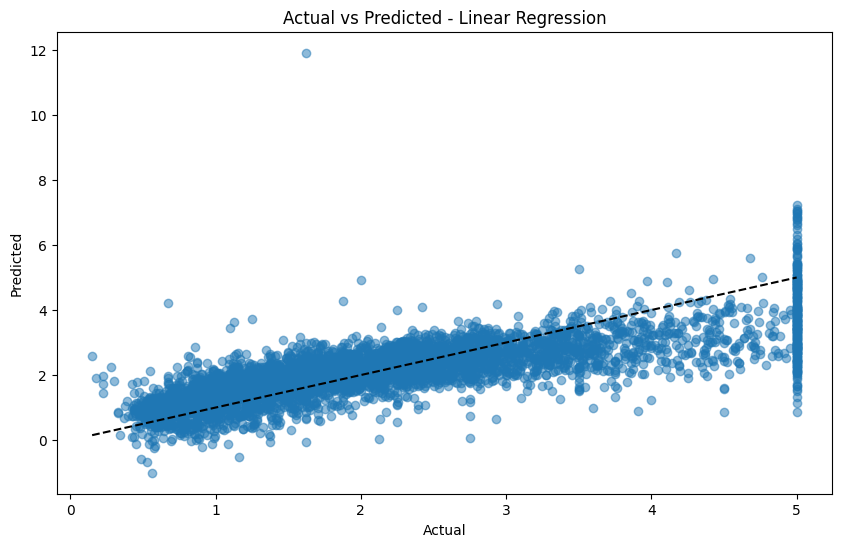

In [15]:
# Visualization for Linear
plot_predictions(y_test, y_pred_lr, "Linear Regression")

__Analysis of the Linear Regression Visualization__

Linear Regression scatter plot demonstrates a general positive correlation between actual and predicted values but with deviations from the ideal match, especially as actual values rise, suggesting a tendency to underpredict at higher values and overpredict at lower ones. A cluster of points at the upper range hints at possible data capping.

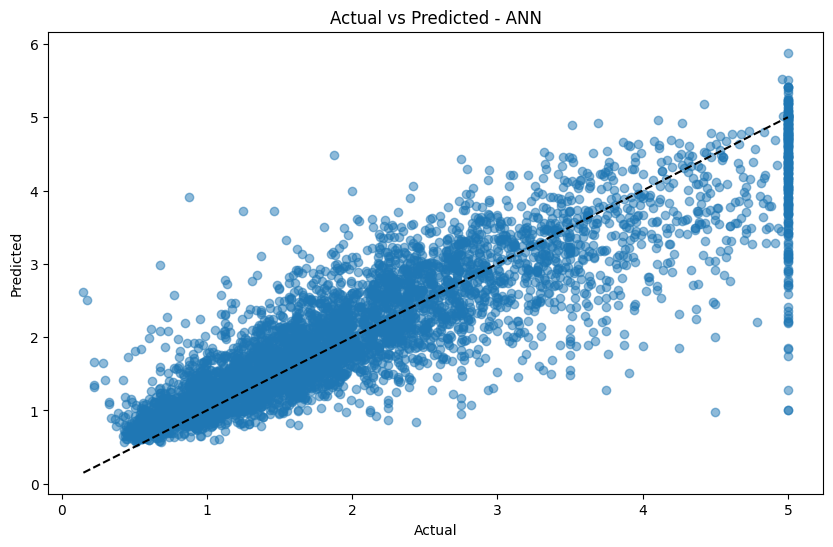

In [16]:
# Visualization for ANN
plot_predictions(y_test, y_pred_ann, "ANN")

__Analysis of the ANN Visualization__

The ANN scatter plot shows predictions more closely hugging the ideal line, with a dense cluster of points indicating tighter predictions across the board, though it too begins to underpredict with increasing actual values and mirrors the Linear Regression's struggle with the highest-valued houses.

In [17]:
# Save models
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(model_ann, open('model_ann.pkl', 'wb'))

__Key Findings on Performance Metrics:__

Linear Regression:

- MAE (Mean Absolute Error): 0.5304

- MSE (Mean Squared Error): 0.5416

- R2 Score: 0.5907

Artificial Neural Network (ANN):

- MAE (Mean Absolute Error): 0.3900

- MSE (Mean Squared Error): 0.3087

- R2 Score: 0.7667

__Insights on Model Performance of Linear Regression and ANN__

As per the result, the Artificial Neural Network (ANN) outperforms the Linear Regression model in MAE, MSE and R2 Score. A lower MAE indicates that the ANN's predictions are closer to the actual values on average. A lower MSE suggests that the ANN's predictions have less variance from the actual values. A higher R2 Score indicates that the ANN model explains a larger proportion of the variance in the target variable for the housing prices than the Linear Regression model.

The result could be due to the nature of both the models whereby ANN's architecture is more capable of capturing more complexx patterns in the data while Linear Regression although much more simpler and faster to trains may not capture hte complexity of the housed market as effectively as ANN. This result also indicates that the California Housing dataset are complex and have non-linear relationships in the data, hence ANN can model more effectively than the Linear Regression.

__Challenges__

As I am not very much familiar yet with the maths behind ANN, choosing the right architecture (number of layers and neurons), activation functions, and other hyperparameters is not straightforward and often requires trial and error. There is also some overfitting concerns with ANN as this model is more prone to overfitting as compared to Linear Regression. For reproducibility, I assigned fixed seed/random state. Without a fixed seed, it's challenging to determine whether differences in model performance are due to the inherent qualities of the models or just random chance. Thus, setting a fixed seed is a key part of the experimental setup for a fair and deterministic comparison between different models.